In [1]:
# Basic Libraries
import pandas as pd
import seaborn as sb
import matplotlib as mp
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, matthews_corrcoef, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
sb.set() # set the default Seaborn style for graphics

In [2]:
#IMPORT CLEANED DATASET FROM CSV FILE
cardio_clean = pd.read_csv('Dataset\cardio_clean.csv')

In [3]:
cardio_clean.head()

,id,Age,Gender,Height,Weight,BMI,AP_HI,AP_LO,Chol,Gluc,Smoke,Alco,Active,Cardio
0,0,50,M,168,62.0,22.0,110,80,N,N,0,0,1,0
1,1,55,F,156,85.0,34.9,140,90,H,N,0,0,1,1
2,2,52,F,165,64.0,23.5,130,70,H,N,0,0,0,1
3,3,48,M,169,82.0,28.7,150,100,N,N,0,0,1,1
4,8,60,F,151,67.0,29.4,120,80,B,B,0,0,0,0


In [4]:
cardio_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58880 entries, 0 to 58879
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      58880 non-null  int64  
 1   Age     58880 non-null  int64  
 2   Gender  58880 non-null  object 
 3   Height  58880 non-null  int64  
 4   Weight  58880 non-null  float64
 5   BMI     58880 non-null  float64
 6   AP_HI   58880 non-null  int64  
 7   AP_LO   58880 non-null  int64  
 8   Chol    58880 non-null  object 
 9   Gluc    58880 non-null  object 
 10  Smoke   58880 non-null  int64  
 11  Alco    58880 non-null  int64  
 12  Active  58880 non-null  int64  
 13  Cardio  58880 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 6.3+ MB


# Logistics Regression

In [5]:
# Extract Response and Predictors
y = pd.DataFrame(cardio_clean["Cardio"])
X = pd.DataFrame(cardio_clean[['Age', 'Height', 'Weight', 'BMI', 'AP_HI', 'AP_LO']])

In [6]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [7]:
# Linear Regression using Train Data
logreg = LogisticRegression()      
logreg.fit(X_train, y_train.values.ravel())

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', logreg.intercept_)
print('Coefficients of Regression \t: a = ', logreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, logreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

Intercept of Regression 	: b =  [-0.0049762]
Coefficients of Regression 	: a =  [[ 0.05464562 -0.08177679  0.0910013  -0.20794858  0.06587215  0.01470292]]

  Predictors  Coefficients
0        Age      0.054646
1     Height     -0.081777
2     Weight      0.091001
3        BMI     -0.207949
4      AP_HI      0.065872
5      AP_LO      0.014703



<AxesSubplot:title={'center':'Test'}, xlabel='Age', ylabel='Cardio'>

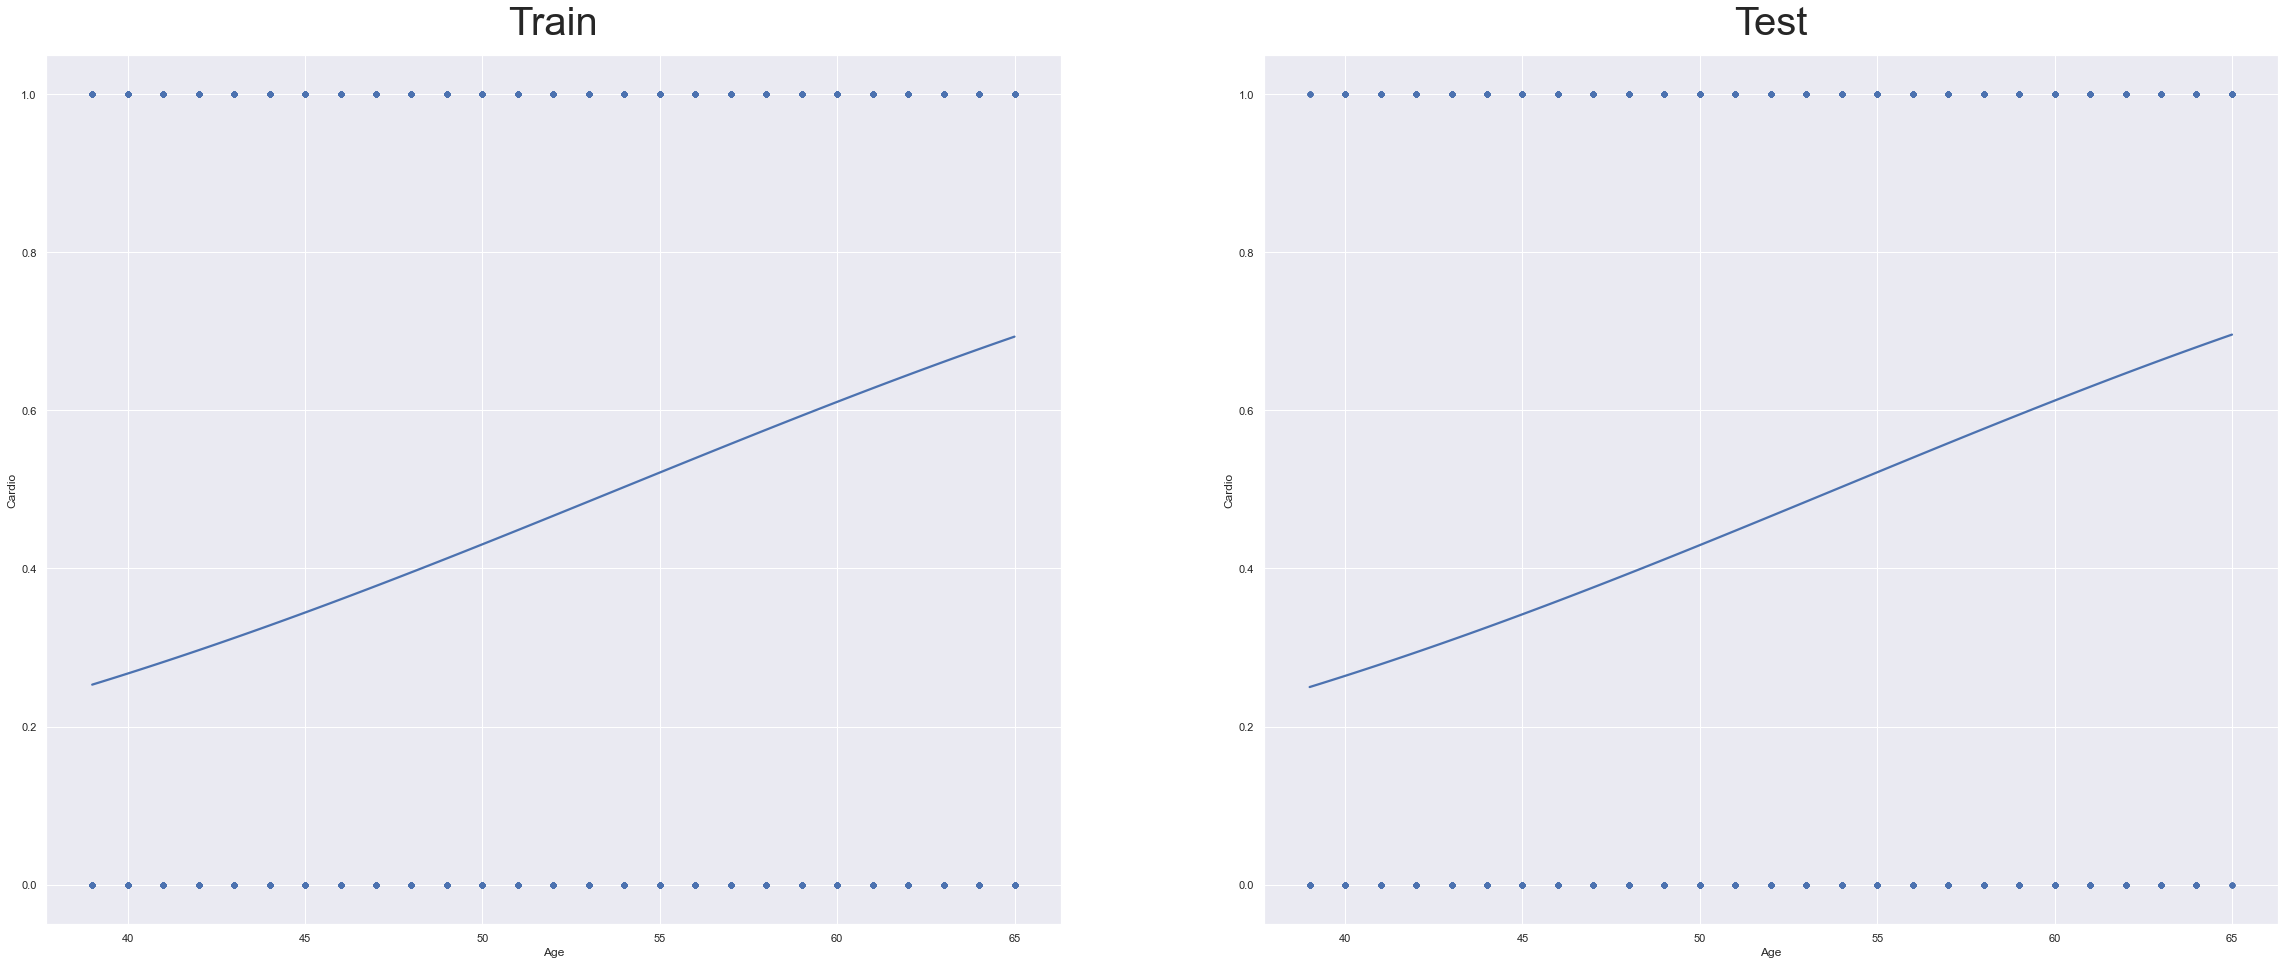

In [8]:
# Plot the logreg for the predictor Age
f,(ax1, ax2) = mp.pyplot.subplots(1, 2, figsize=(40, 16) )
dicto = {'fontsize': 40,
 'fontweight' : 200,
 'verticalalignment': 'baseline'}
ax1.set_title('Train', fontdict = dicto, pad = 20)
ax2.set_title('Test', fontdict = dicto, pad = 20)
sb.regplot(x=X_train['Age'], y=y_train, data=cardio_clean, logistic=True, ci=None, scatter_kws={'s':20}, ax = ax1)
sb.regplot(x=X_test['Age'], y=y_test, data=cardio_clean, logistic=True, ci=None, scatter_kws={'s':20},  ax = ax2)

<AxesSubplot:title={'center':'Test'}, xlabel='Height', ylabel='Cardio'>

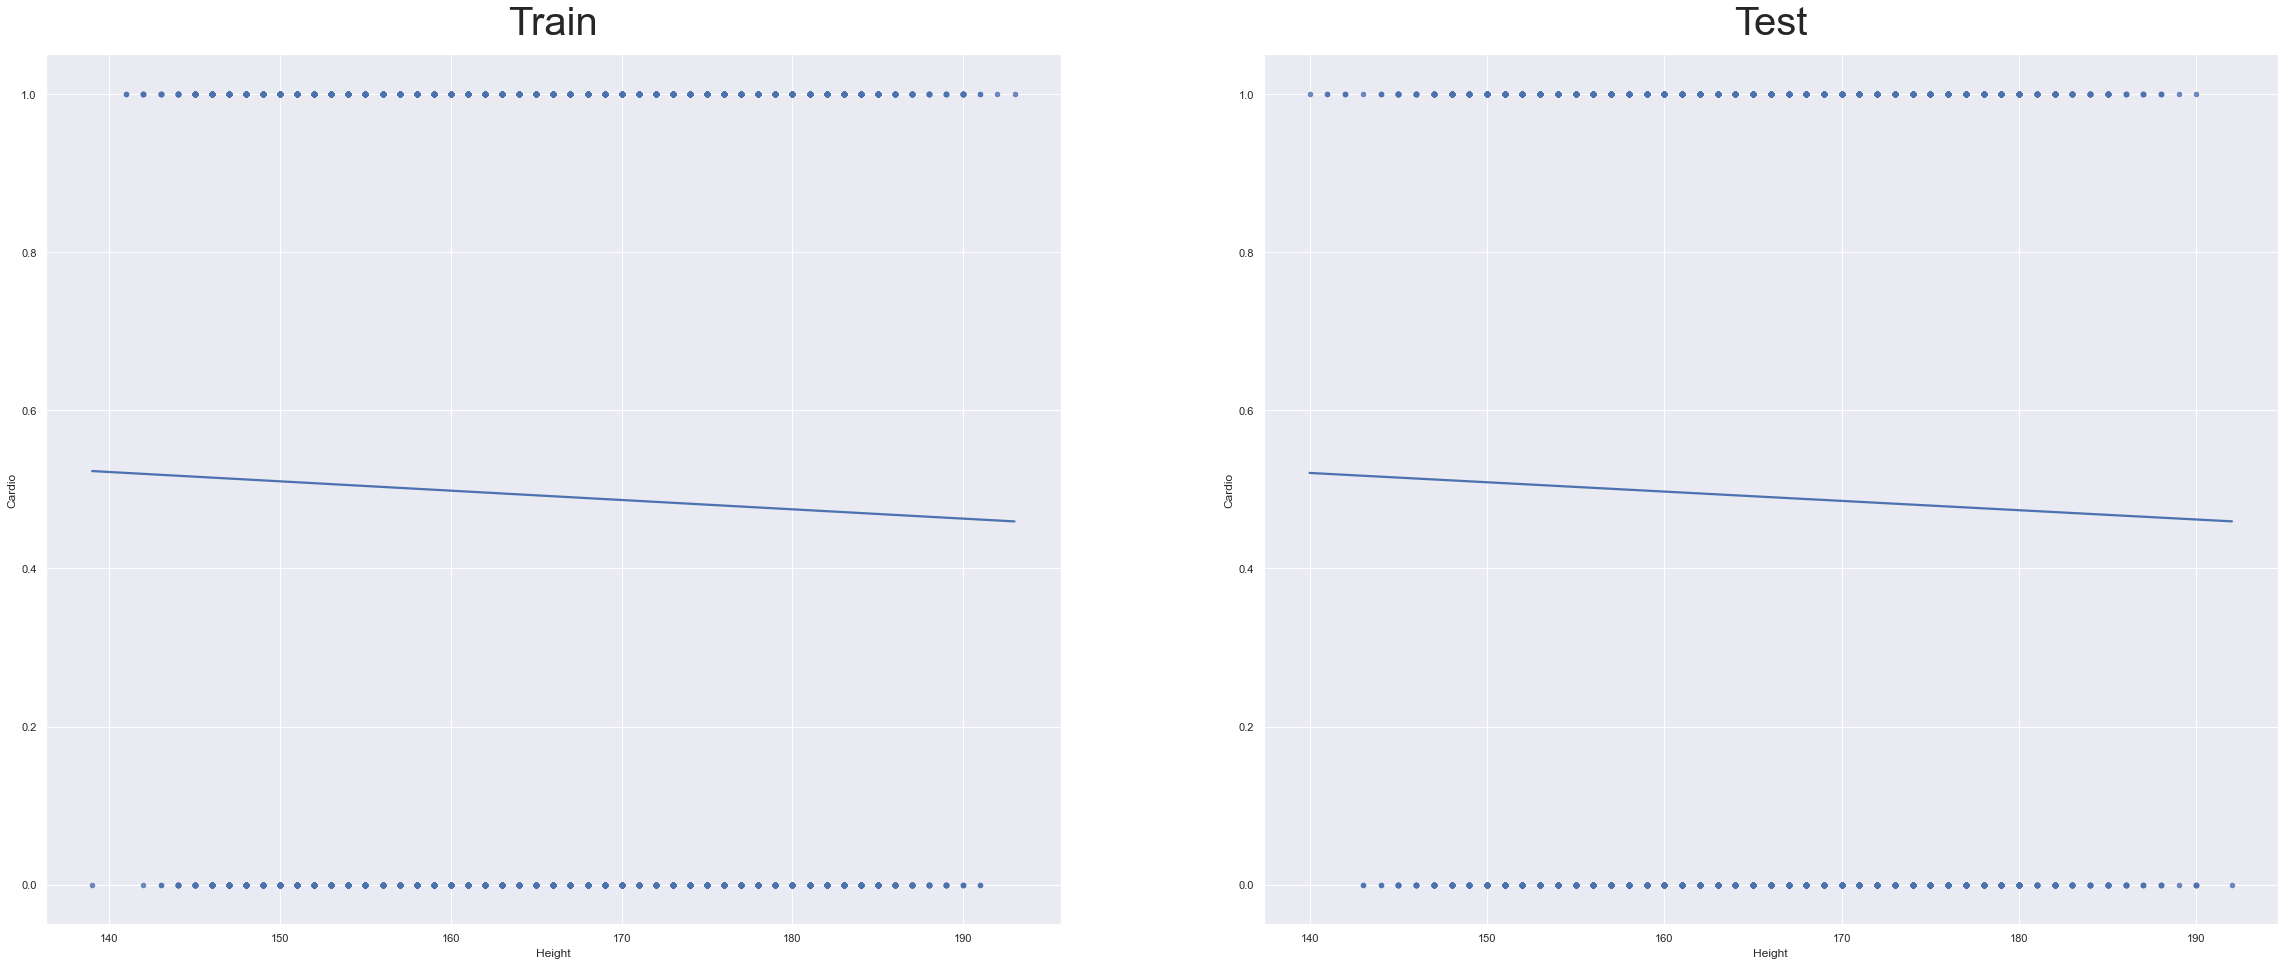

In [9]:
# Plot the logreg for the predictor Height
f,(ax1, ax2) = mp.pyplot.subplots(1, 2, figsize=(40, 16) )
dicto = {'fontsize': 40,
 'fontweight' : 200,
 'verticalalignment': 'baseline'}
ax1.set_title('Train', fontdict = dicto, pad = 20)
ax2.set_title('Test', fontdict = dicto, pad = 20)
sb.regplot(x=X_train['Height'], y=y_train, data=cardio_clean, logistic=True, ci=None, scatter_kws={'s':20}, ax = ax1)
sb.regplot(x=X_test['Height'], y=y_test, data=cardio_clean, logistic=True, ci=None, scatter_kws={'s':20},  ax = ax2)

<AxesSubplot:title={'center':'Test'}, xlabel='Weight', ylabel='Cardio'>

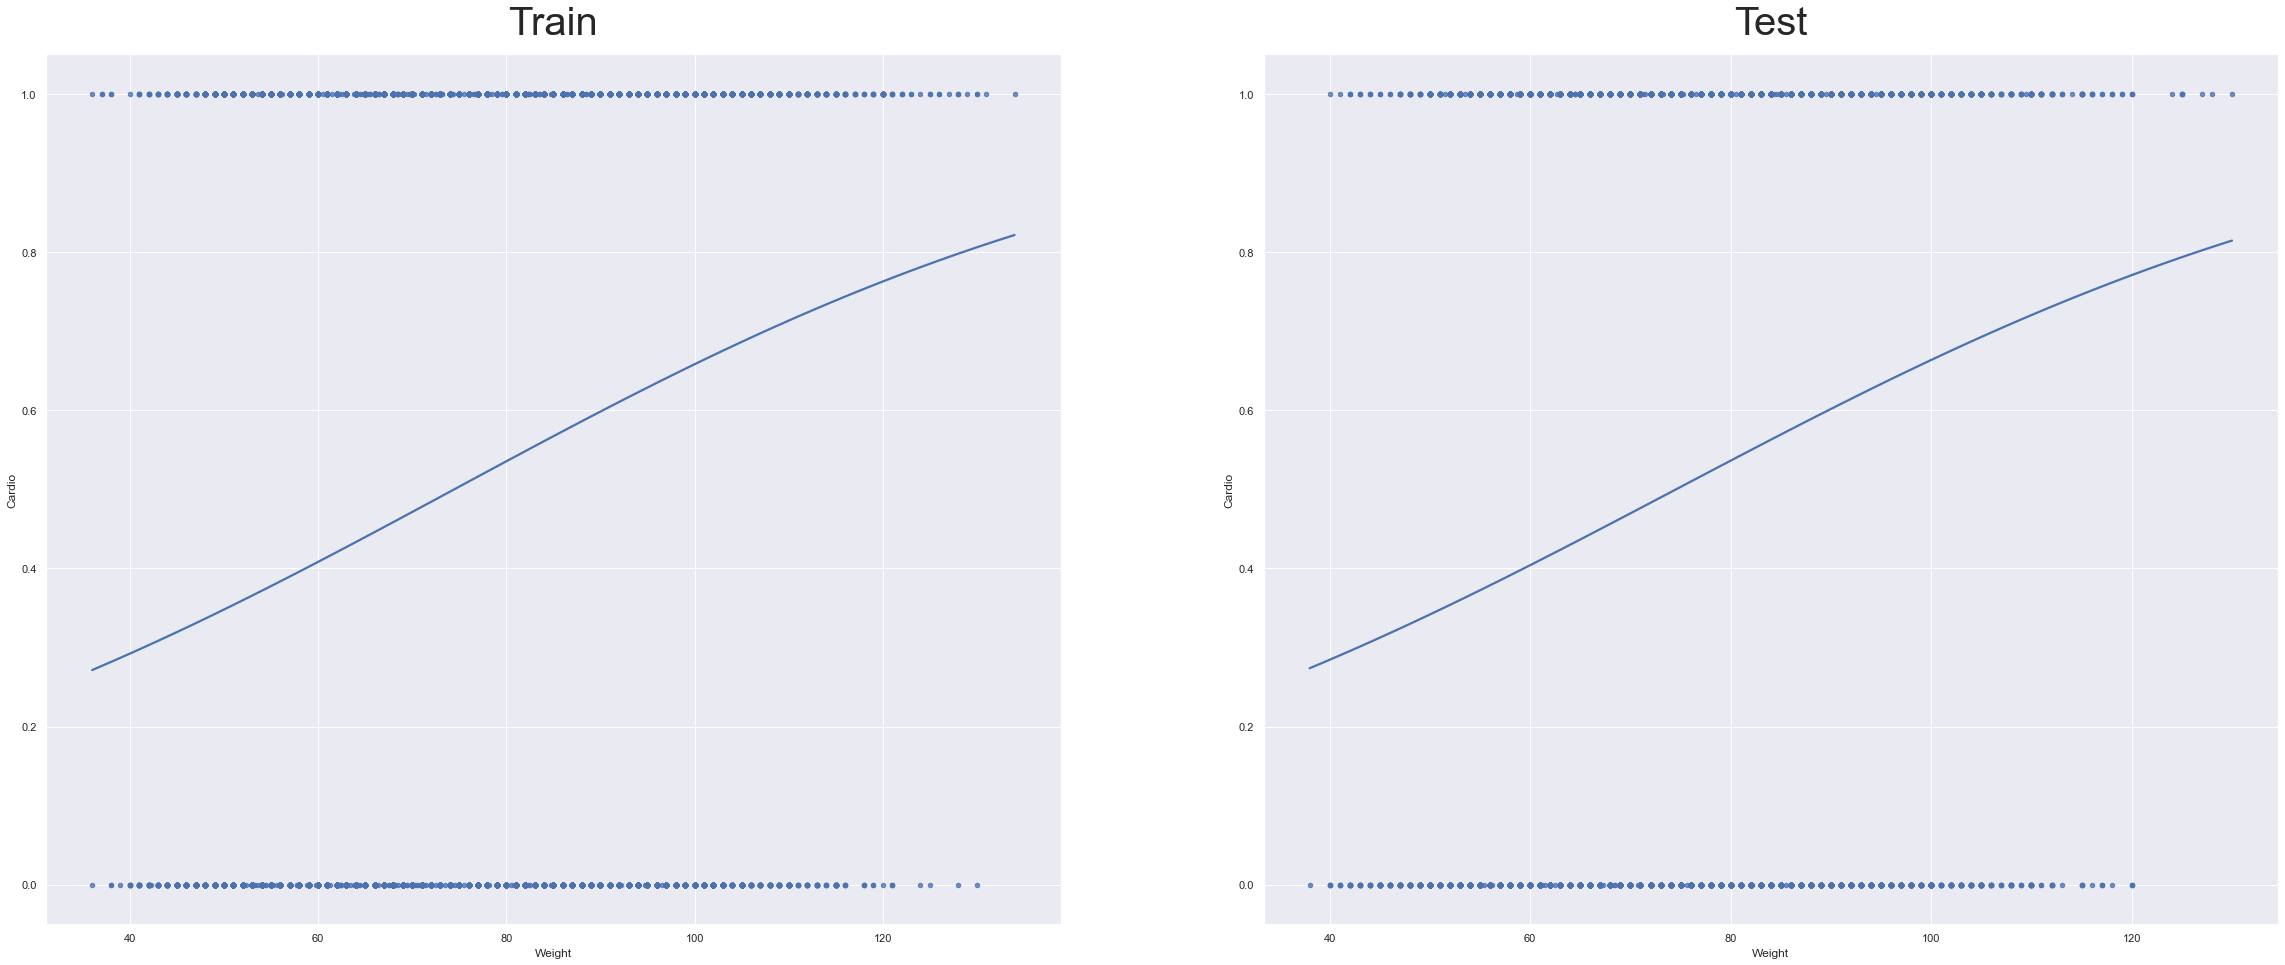

In [10]:
# Plot the logreg for the predictor Weight
f,(ax1, ax2) = mp.pyplot.subplots(1, 2, figsize=(40, 16) )
dicto = {'fontsize': 40,
 'fontweight' : 200,
 'verticalalignment': 'baseline'}
ax1.set_title('Train', fontdict = dicto, pad = 20)
ax2.set_title('Test', fontdict = dicto, pad = 20)
sb.regplot(x=X_train['Weight'], y=y_train, data=cardio_clean, logistic=True, ci=None, scatter_kws={'s':20}, ax = ax1)
sb.regplot(x=X_test['Weight'], y=y_test, data=cardio_clean, logistic=True, ci=None, scatter_kws={'s':20},  ax = ax2)

<AxesSubplot:title={'center':'Test'}, xlabel='BMI', ylabel='Cardio'>

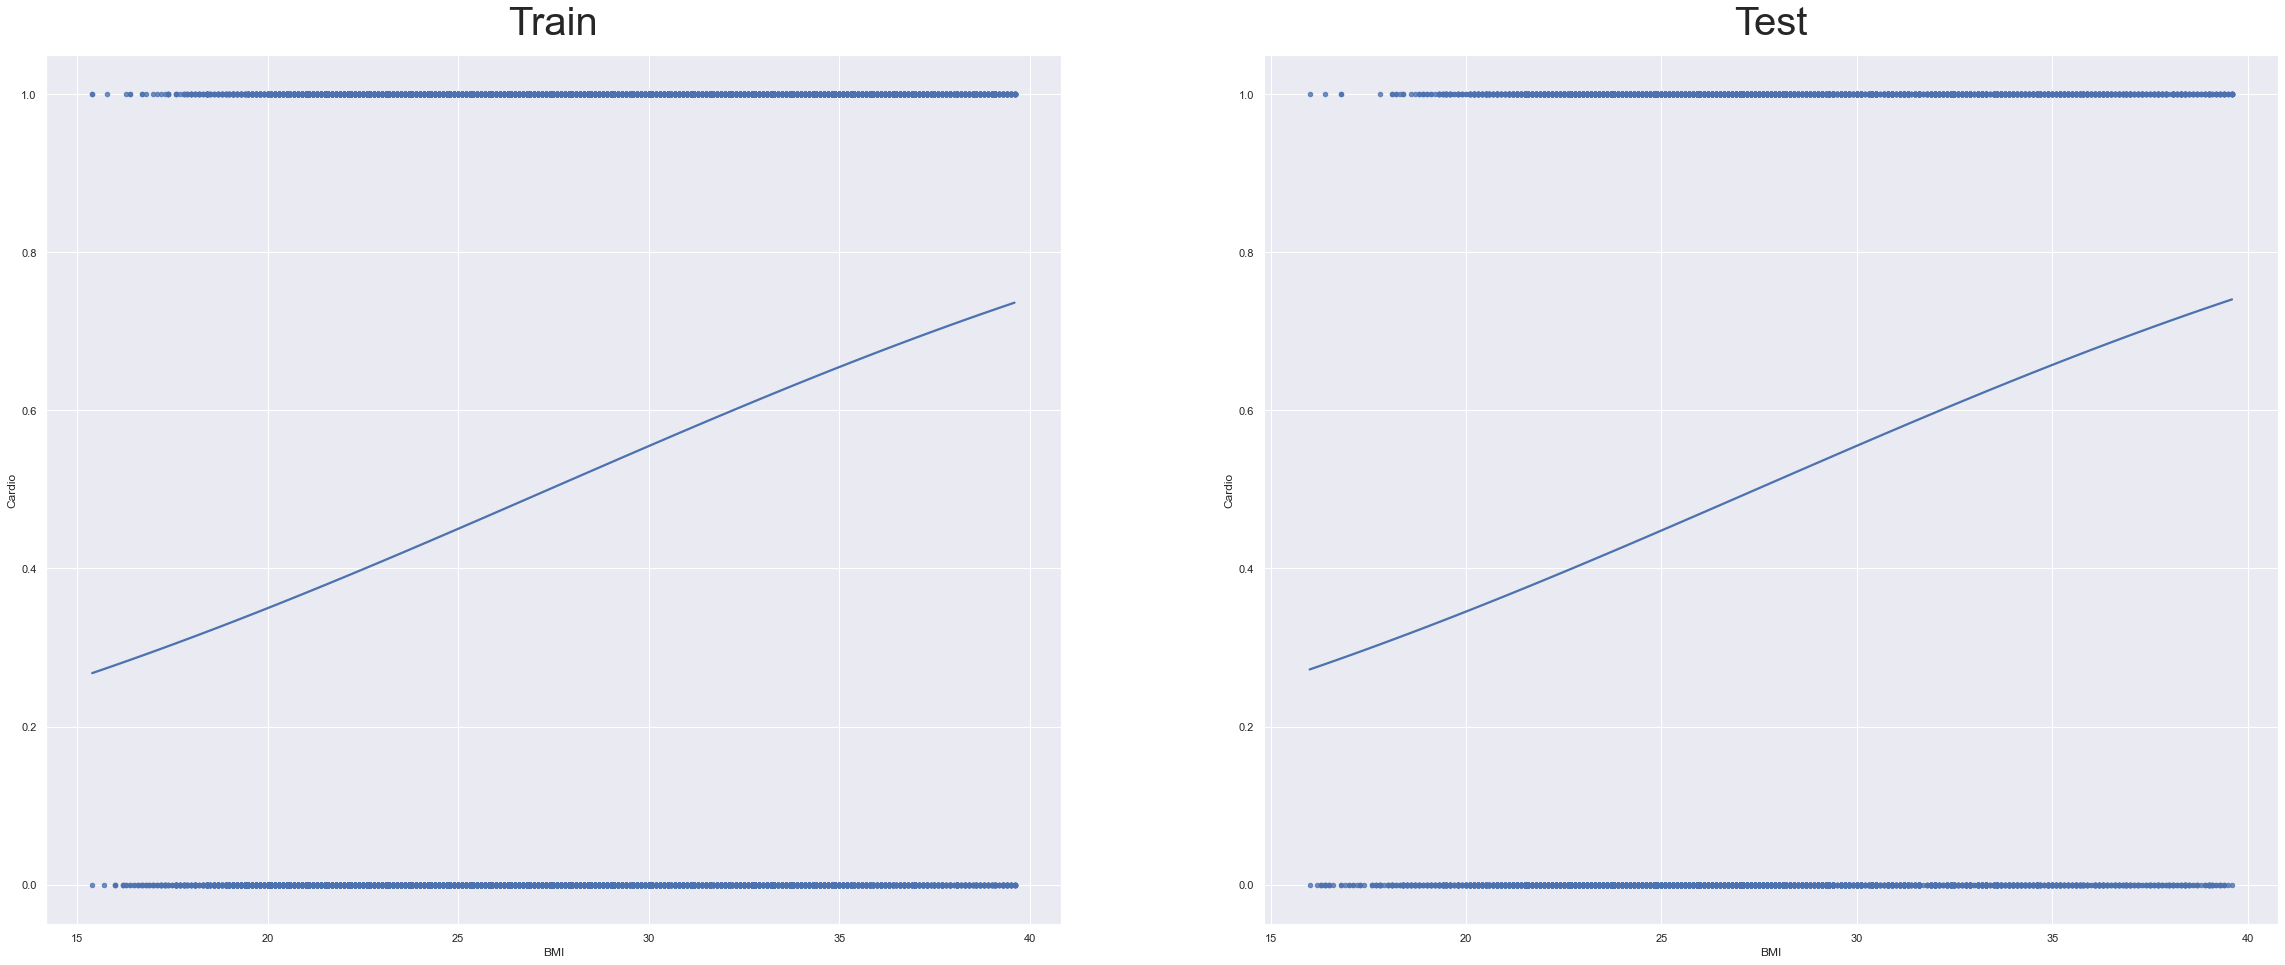

In [11]:
# Plot the logreg for the predictor BMI
f,(ax1, ax2) = mp.pyplot.subplots(1, 2, figsize=(40, 16) )
dicto = {'fontsize': 40,
 'fontweight' : 200,
 'verticalalignment': 'baseline'}
ax1.set_title('Train', fontdict = dicto, pad = 20)
ax2.set_title('Test', fontdict = dicto, pad = 20)
sb.regplot(x=X_train['BMI'], y=y_train, data=cardio_clean, logistic=True, ci=None, scatter_kws={'s':20}, ax = ax1)
sb.regplot(x=X_test['BMI'], y=y_test, data=cardio_clean, logistic=True, ci=None, scatter_kws={'s':20},  ax = ax2)

<AxesSubplot:title={'center':'Test'}, xlabel='AP_HI', ylabel='Cardio'>

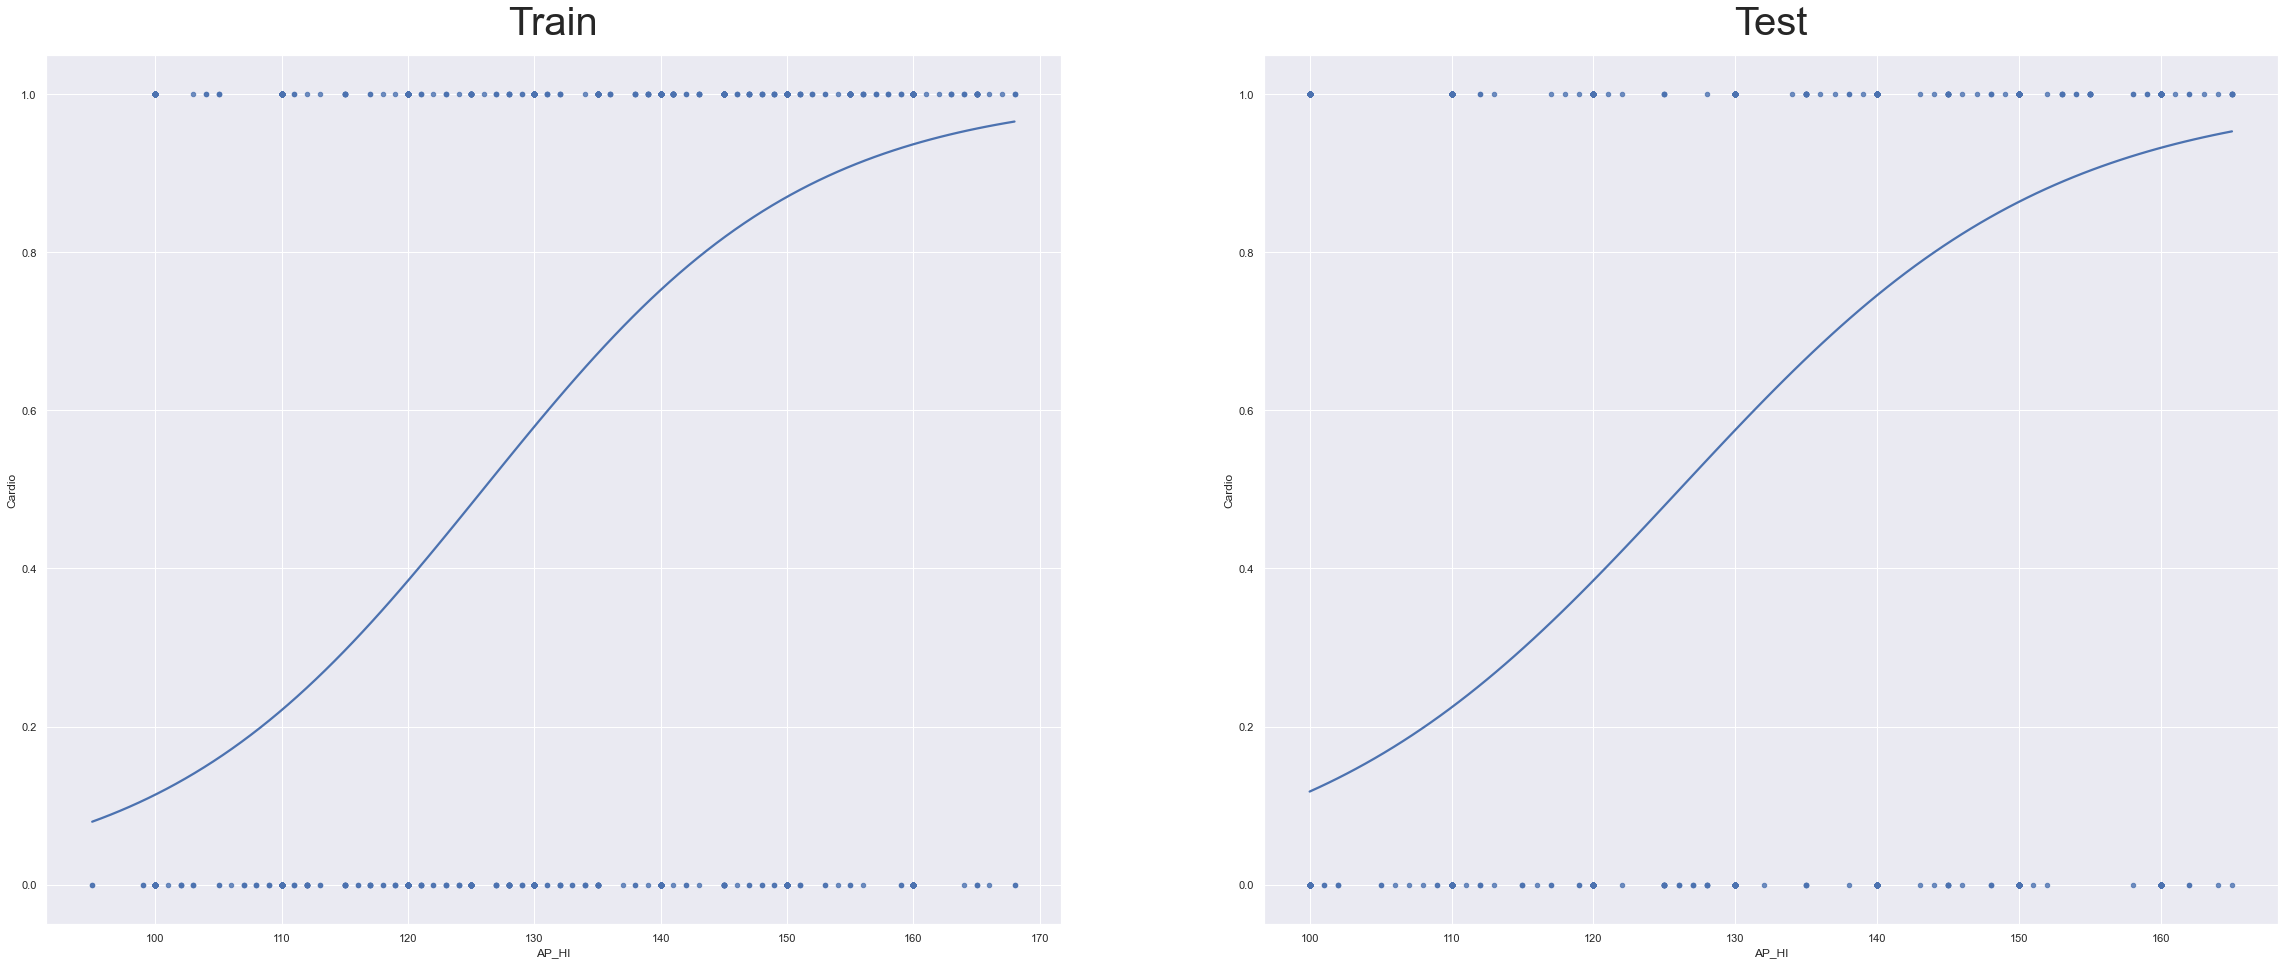

In [12]:
# Plot the logreg for the predictor AP_HI
f,(ax1, ax2) = mp.pyplot.subplots(1, 2, figsize=(40, 16) )
dicto = {'fontsize': 40,
 'fontweight' : 200,
 'verticalalignment': 'baseline'}
ax1.set_title('Train', fontdict = dicto, pad = 20)
ax2.set_title('Test', fontdict = dicto, pad = 20)
sb.regplot(x=X_train['AP_HI'], y=y_train, data=cardio_clean, logistic=True, ci=None, scatter_kws={'s':20}, ax = ax1)
sb.regplot(x=X_test['AP_HI'], y=y_test, data=cardio_clean, logistic=True, ci=None, scatter_kws={'s':20},  ax = ax2)

<AxesSubplot:title={'center':'Test'}, xlabel='AP_LO', ylabel='Cardio'>

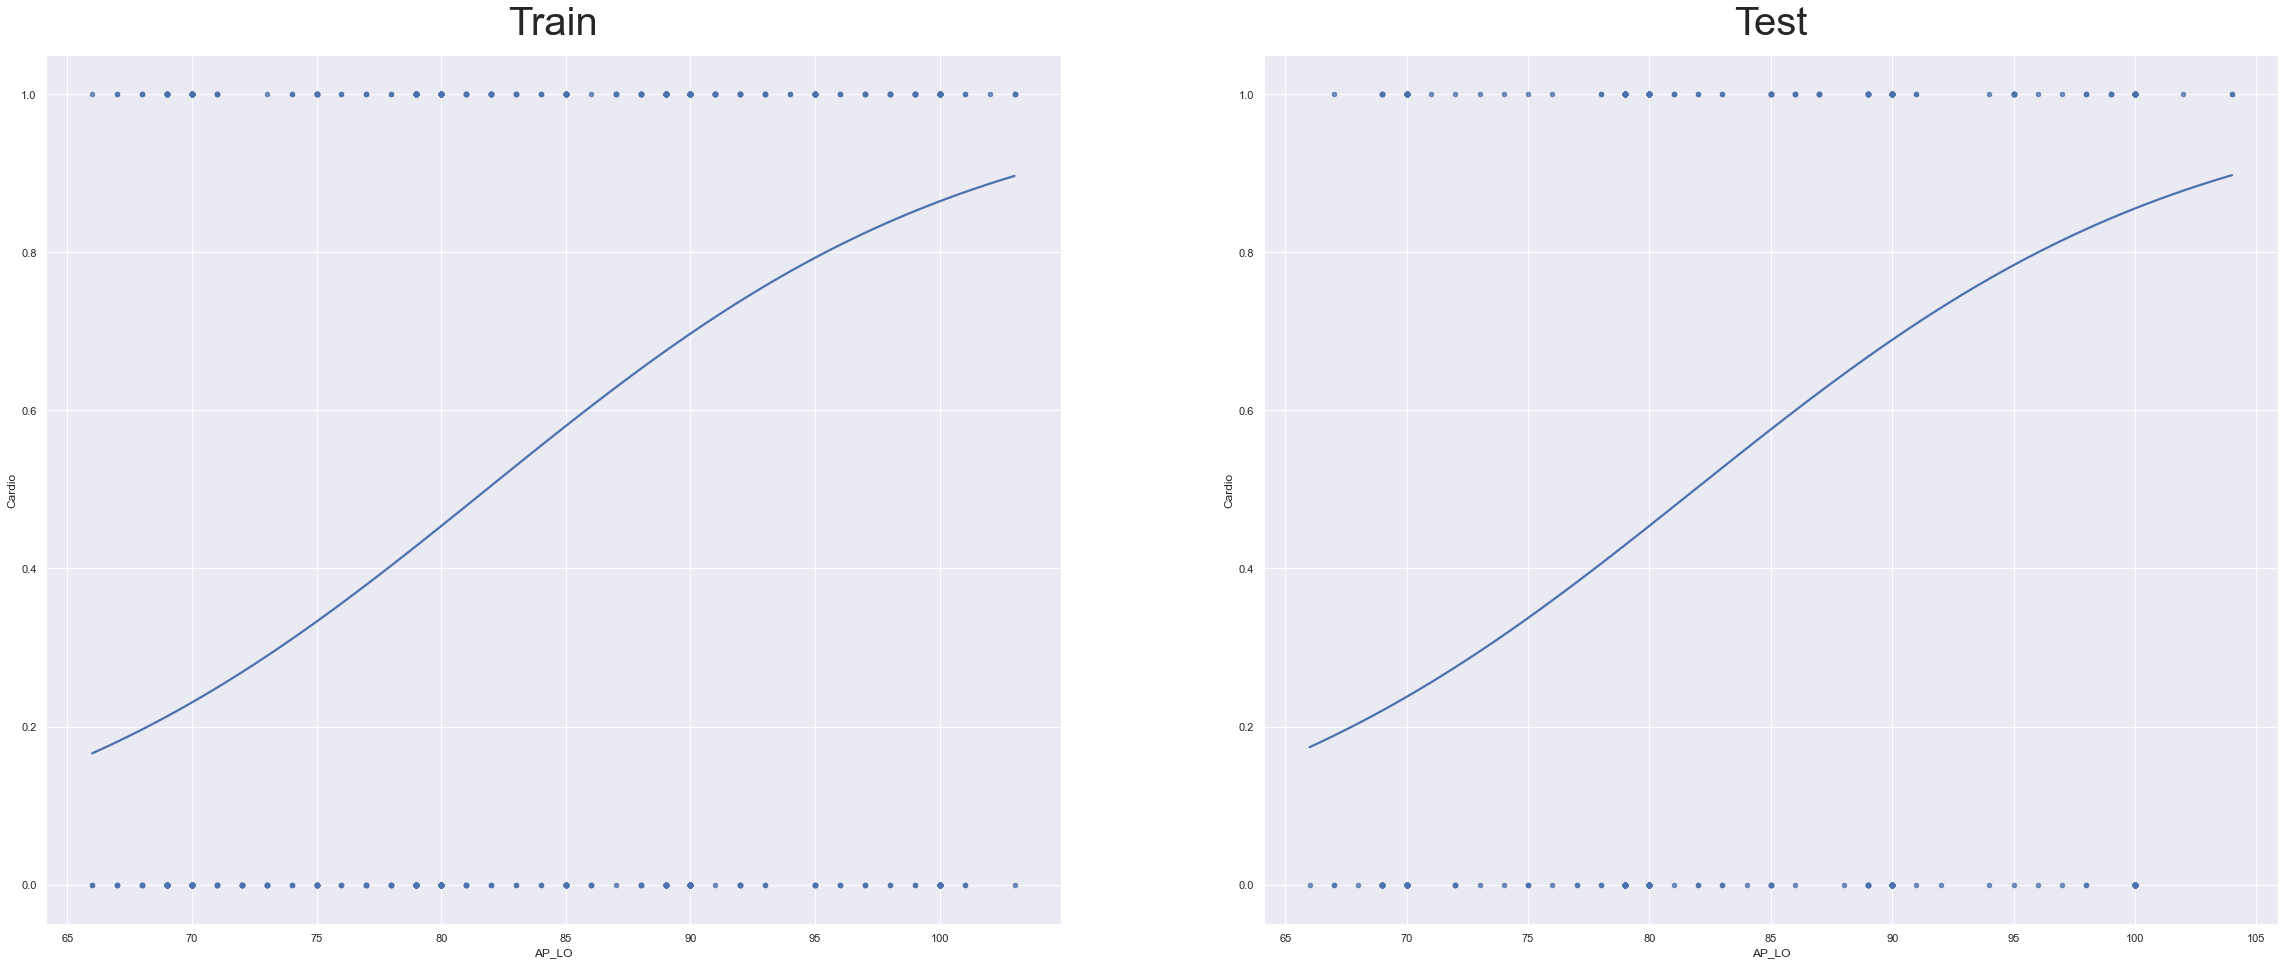

In [13]:
# Plot the logreg for the predictor AP_LO
f,(ax1, ax2) = mp.pyplot.subplots(1, 2, figsize=(40, 16) )
dicto = {'fontsize': 40,
 'fontweight' : 200,
 'verticalalignment': 'baseline'}
ax1.set_title('Train', fontdict = dicto, pad = 20)
ax2.set_title('Test', fontdict = dicto, pad = 20)
sb.regplot(x=X_train['AP_LO'], y=y_train, data=cardio_clean, logistic=True, ci=None, scatter_kws={'s':20}, ax = ax1)
sb.regplot(x=X_test['AP_LO'], y=y_test, data=cardio_clean, logistic=True, ci=None, scatter_kws={'s':20},  ax = ax2)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7140625
Mean Squared Error (MSE) 	: 0.2859375
Matthews corrcoef  (MCC) 	: 0.43050264280367095
test accuracy : 0.7140625

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7114809782608695
Mean Squared Error (MSE) 	: 0.2885190217391304
Matthews corrcoef  (MCC) 	: 0.4253654924112539
test accuracy : 0.7114809782608695



<AxesSubplot:>

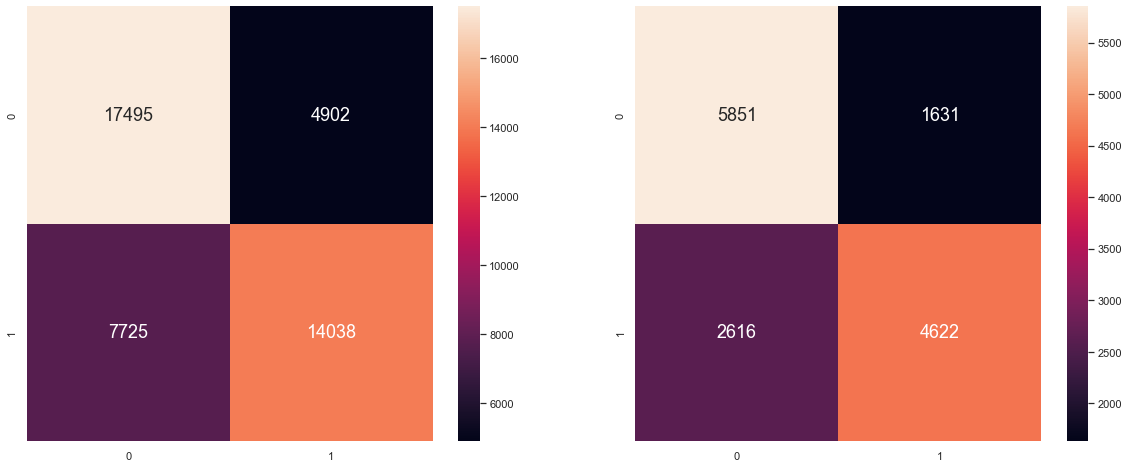

In [14]:
# Training set performance
log_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
log_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
log_train_as = accuracy_score(y_train,y_train_pred)
log_test_as = accuracy_score(y_test,y_test_pred)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", logreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Matthews corrcoef  (MCC) \t:", log_train_mcc)
print('test accuracy :', log_train_as)
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", logreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Matthews corrcoef  (MCC) \t:", log_test_mcc)
print('test accuracy :', log_test_as)
print()

f, axes = plt.subplots(1, 2, figsize=(20, 8))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])